In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv')

In [3]:
df = data.copy()

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data preparation

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [6]:
cols = list(df.dtypes[df.dtypes == 'object'].index)

for c in cols:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [7]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [8]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [9]:
df.market_category.nunique()

71

In [10]:
df['market_category'] = df['market_category'].fillna("Unknown")

In [11]:
df.engine_fuel_type.describe()

count                11911
unique                  10
top       regular_unleaded
freq                  7172
Name: engine_fuel_type, dtype: object

In [12]:
df = df.dropna(subset=['engine_fuel_type'])


<Axes: >

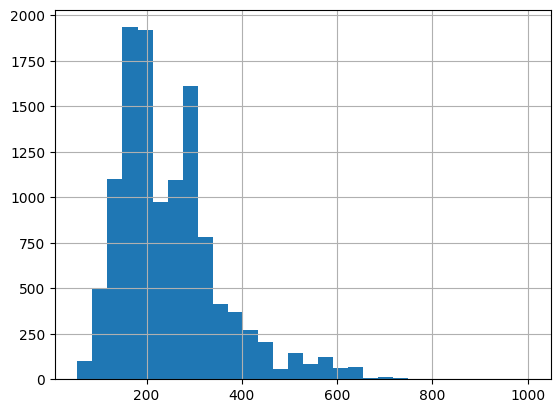

In [13]:
df.engine_hp.hist(bins = 30)

In [14]:
df.engine_hp = df.engine_hp.fillna(df['engine_hp'].median())

In [15]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      0
engine_hp             0
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
market_category       0
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

In [16]:
df.engine_cylinders.describe()

count    11881.000000
mean         5.628735
std          1.780774
min          0.000000
25%          4.000000
50%          6.000000
75%          6.000000
max         16.000000
Name: engine_cylinders, dtype: float64

<Axes: >

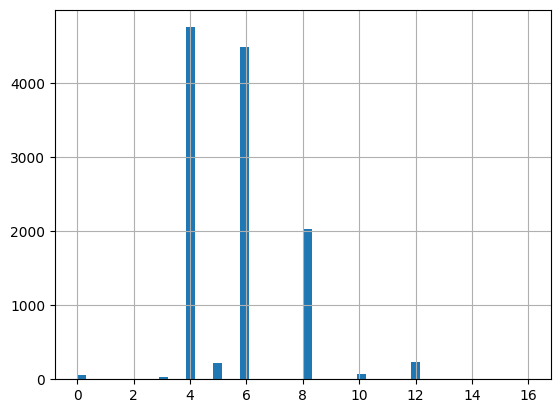

In [17]:
df.engine_cylinders.hist(bins = 50)

In [18]:
df.engine_cylinders.mean(), df.engine_cylinders.median()

(np.float64(5.62873495497012), np.float64(6.0))

In [19]:
df['engine_cylinders'] = df['engine_cylinders'].fillna(df['engine_cylinders'].mean())

In [20]:
df['number_of_doors'] = df['number_of_doors'].fillna(df['number_of_doors'].mode()[0])

In [21]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

# EDA

In [22]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


<Axes: xlabel='msrp', ylabel='Count'>

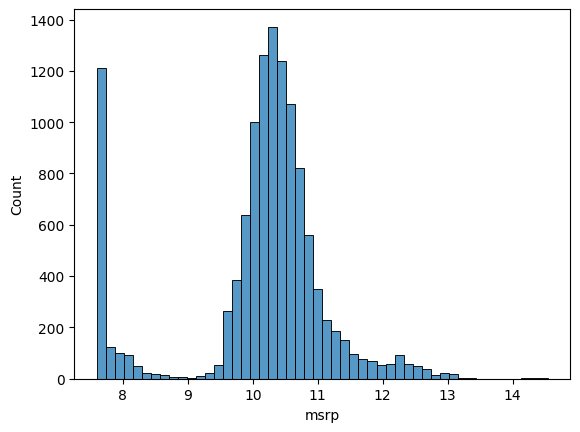

In [23]:
sns.histplot(np.log1p(df.msrp), bins = 50)

In [24]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

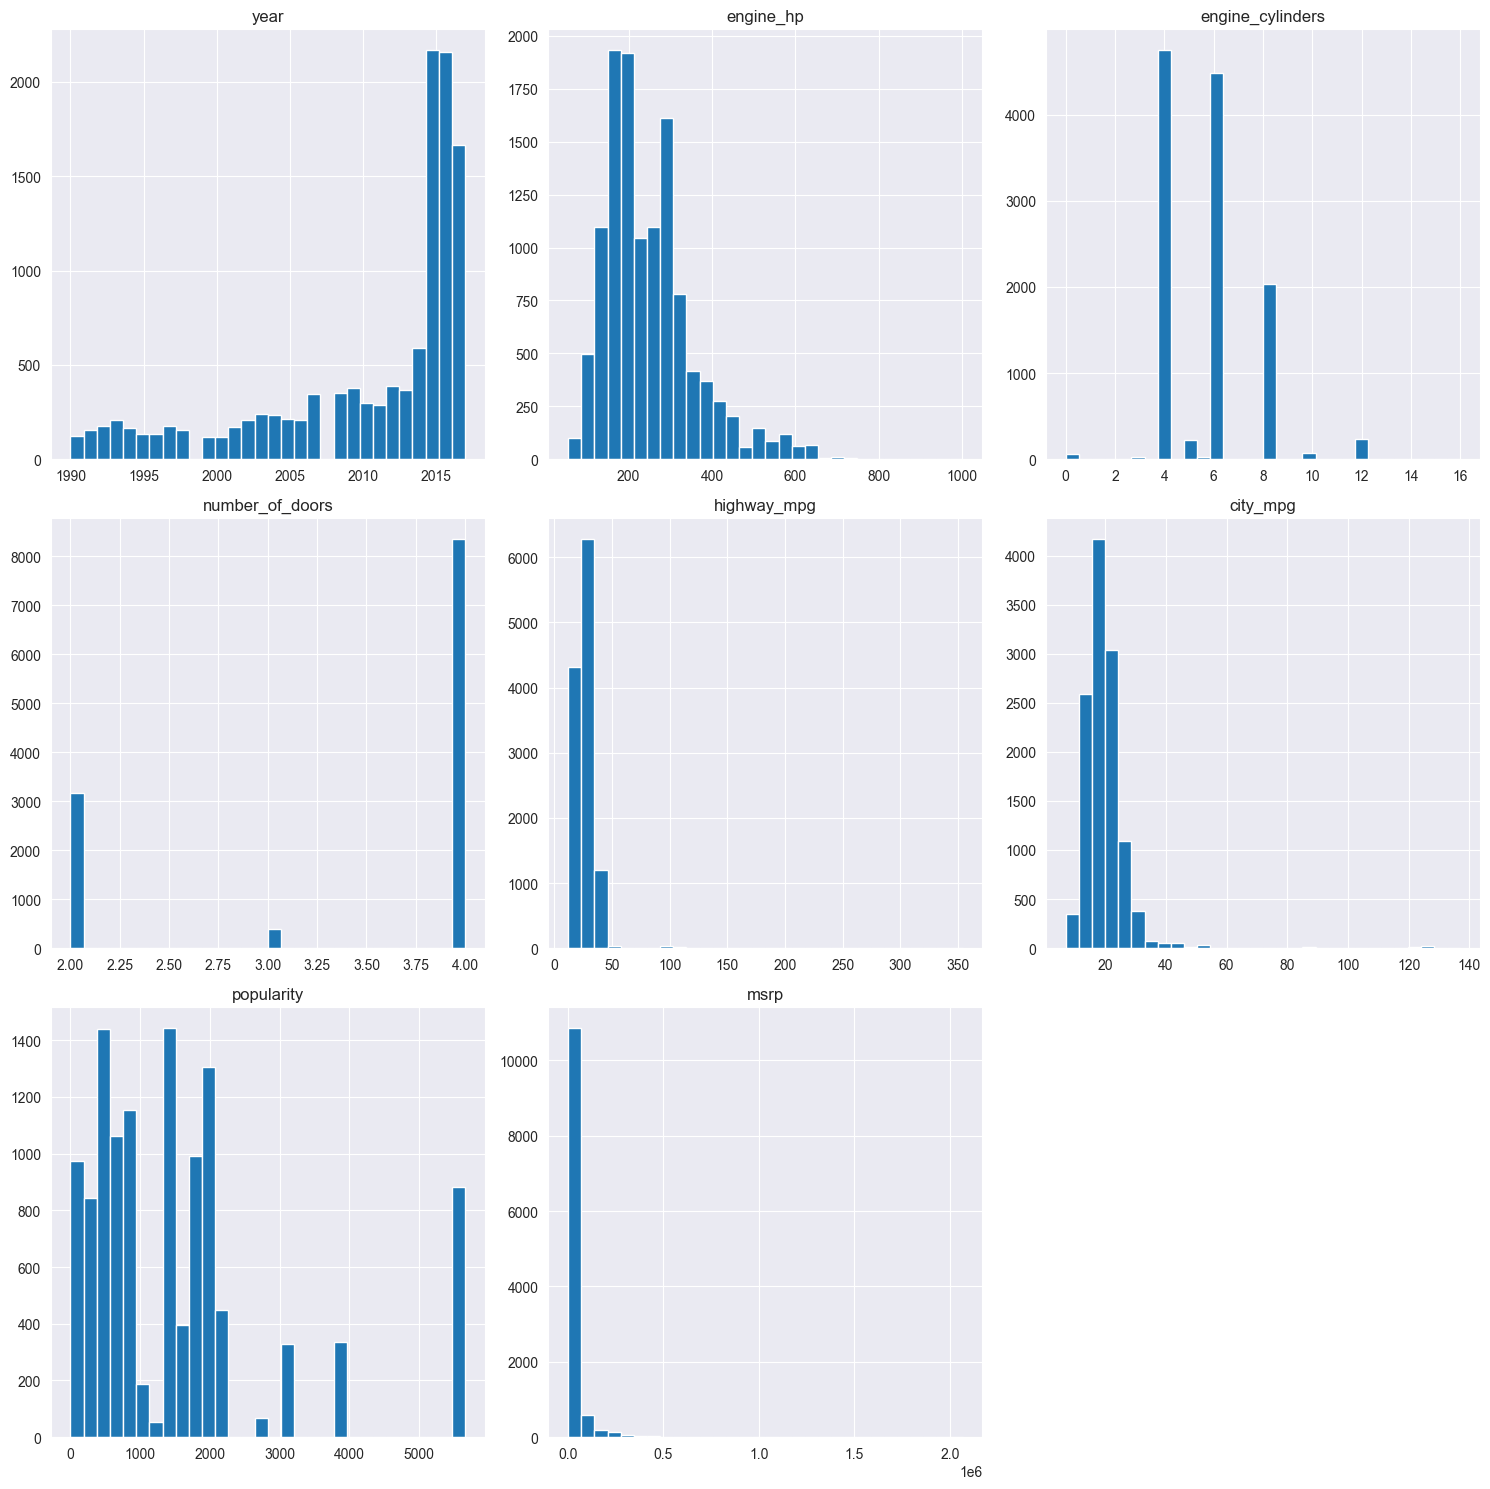

In [25]:
sns.set_style('dark')
df.hist(figsize = (15, 15), bins = 30)
plt.tight_layout()

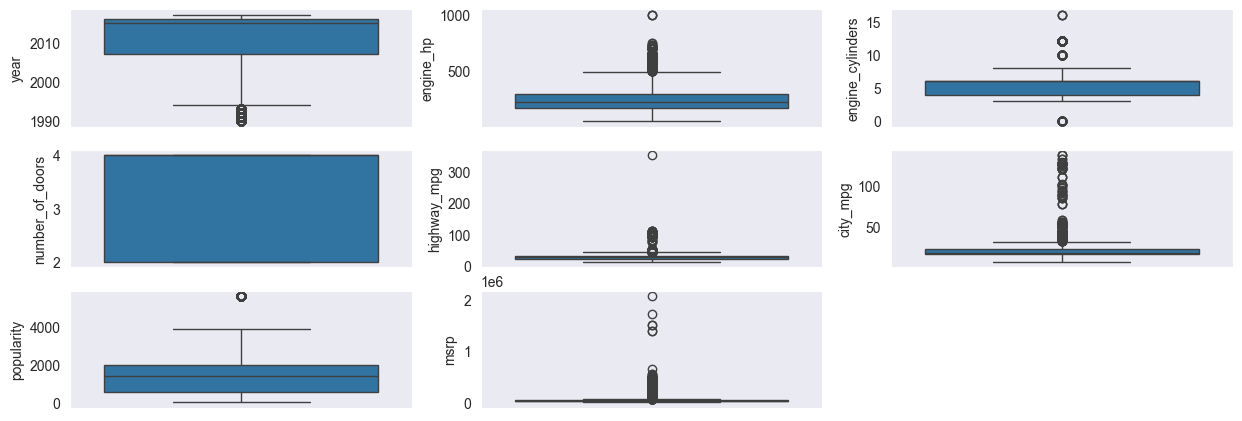

In [26]:
plt.figure(figsize = (15, 7))
i = 1
for feature in df.columns:
    if df[feature].dtypes != "object":
        plt.subplot(4, 3, i)
        sns.boxplot(df[feature])
        i+=1

# Setting Up Validation

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [29]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [30]:
len(df_train), len(df_val), len(df_test)

(7146, 2382, 2383)

In [31]:
y_train = df_train['msrp'].values
y_val = df_val['msrp'].values
y_test = df_test['msrp'].values

In [32]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [33]:
df_full_train.msrp

5603     149995
333       29990
9374      44840
939      102930
9195       2125
          ...  
7813      53500
10955     47975
905        2000
5192      22220
235       32315
Name: msrp, Length: 9528, dtype: int64

In [34]:
cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [35]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
3820,oldsmobile,eighty-eight_royale,1995,regular_unleaded,205.0,6.0,automatic,front_wheel_drive,4.0,Unknown,large,sedan,26,17,26
3822,oldsmobile,eighty-eight_royale,1995,regular_unleaded,225.0,6.0,automatic,front_wheel_drive,4.0,Unknown,large,sedan,26,17,26
3833,hyundai,elantra_coupe,2013,regular_unleaded,145.0,4.0,automatic,front_wheel_drive,2.0,Unknown,compact,coupe,37,27,1439
2066,mercedes-benz,c-class,2015,premium_unleaded_(required),241.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,34,25,617
3124,honda,crosstour,2015,regular_unleaded,192.0,4.0,automatic,front_wheel_drive,4.0,"crossover,hatchback",midsize,4dr_hatchback,31,22,2202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10272,ford,taurus_x,2008,regular_unleaded,260.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,22,15,5657
9837,kia,sorento,2017,regular_unleaded,185.0,4.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,25,21,1720
7777,infiniti,q50,2015,premium_unleaded_(recommended),360.0,6.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",midsize,sedan,36,29,190
7308,dodge,omni,1990,regular_unleaded,93.0,4.0,manual,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,31,22,1851


In [36]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop='first',handle_unknown='ignore')
df_train_transformed=ohe.fit_transform(df_train[cols])
df_val_transformed=ohe.transform(df_val[cols])
df_test_transformed=ohe.transform(df_test[cols])
df_train_transformed.toarray()

C:\Users\RTC\anaconda3\envs\jupyter_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
C:\Users\RTC\anaconda3\envs\jupyter_env\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(7146, 1041))

In [37]:
encoded_cols = ohe.get_feature_names_out()
df_train_transformed= pd.DataFrame(df_train_transformed.toarray(), columns=encoded_cols, index=df_train.index)
df_val_transformed= pd.DataFrame(df_val_transformed.toarray(), columns=encoded_cols, index=df_val.index)
df_test_transformed= pd.DataFrame(df_test_transformed.toarray(), columns=encoded_cols, index=df_test.index)

In [38]:
df_train = df_train.drop(cols, axis = 1)
df_val = df_val.drop(cols, axis = 1)
df_test = df_test.drop(cols, axis = 1)

In [39]:
df_train_updated = pd.concat([df_train, df_train_transformed], axis = 1)
df_val_updated = pd.concat([df_val, df_val_transformed], axis = 1)
df_test_updated = pd.concat([df_test, df_test_transformed], axis = 1)

In [40]:
df_train_updated

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,make_alfa_romeo,make_aston_martin,make_audi,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
3820,1995,205.0,6.0,4.0,26,17,26,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3822,1995,225.0,6.0,4.0,26,17,26,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3833,2013,145.0,4.0,2.0,37,27,1439,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2066,2015,241.0,4.0,4.0,34,25,617,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3124,2015,192.0,4.0,4.0,31,22,2202,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10272,2008,260.0,6.0,4.0,22,15,5657,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9837,2017,185.0,4.0,4.0,25,21,1720,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7777,2015,360.0,6.0,4.0,36,29,190,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7308,1990,93.0,4.0,4.0,31,22,1851,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

<Axes: ylabel='Count'>

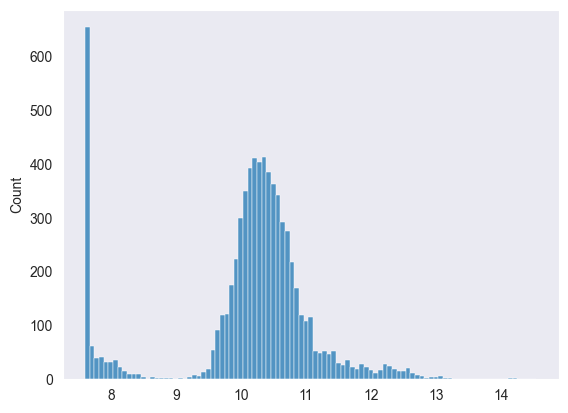

In [42]:
sns.histplot(y_train)

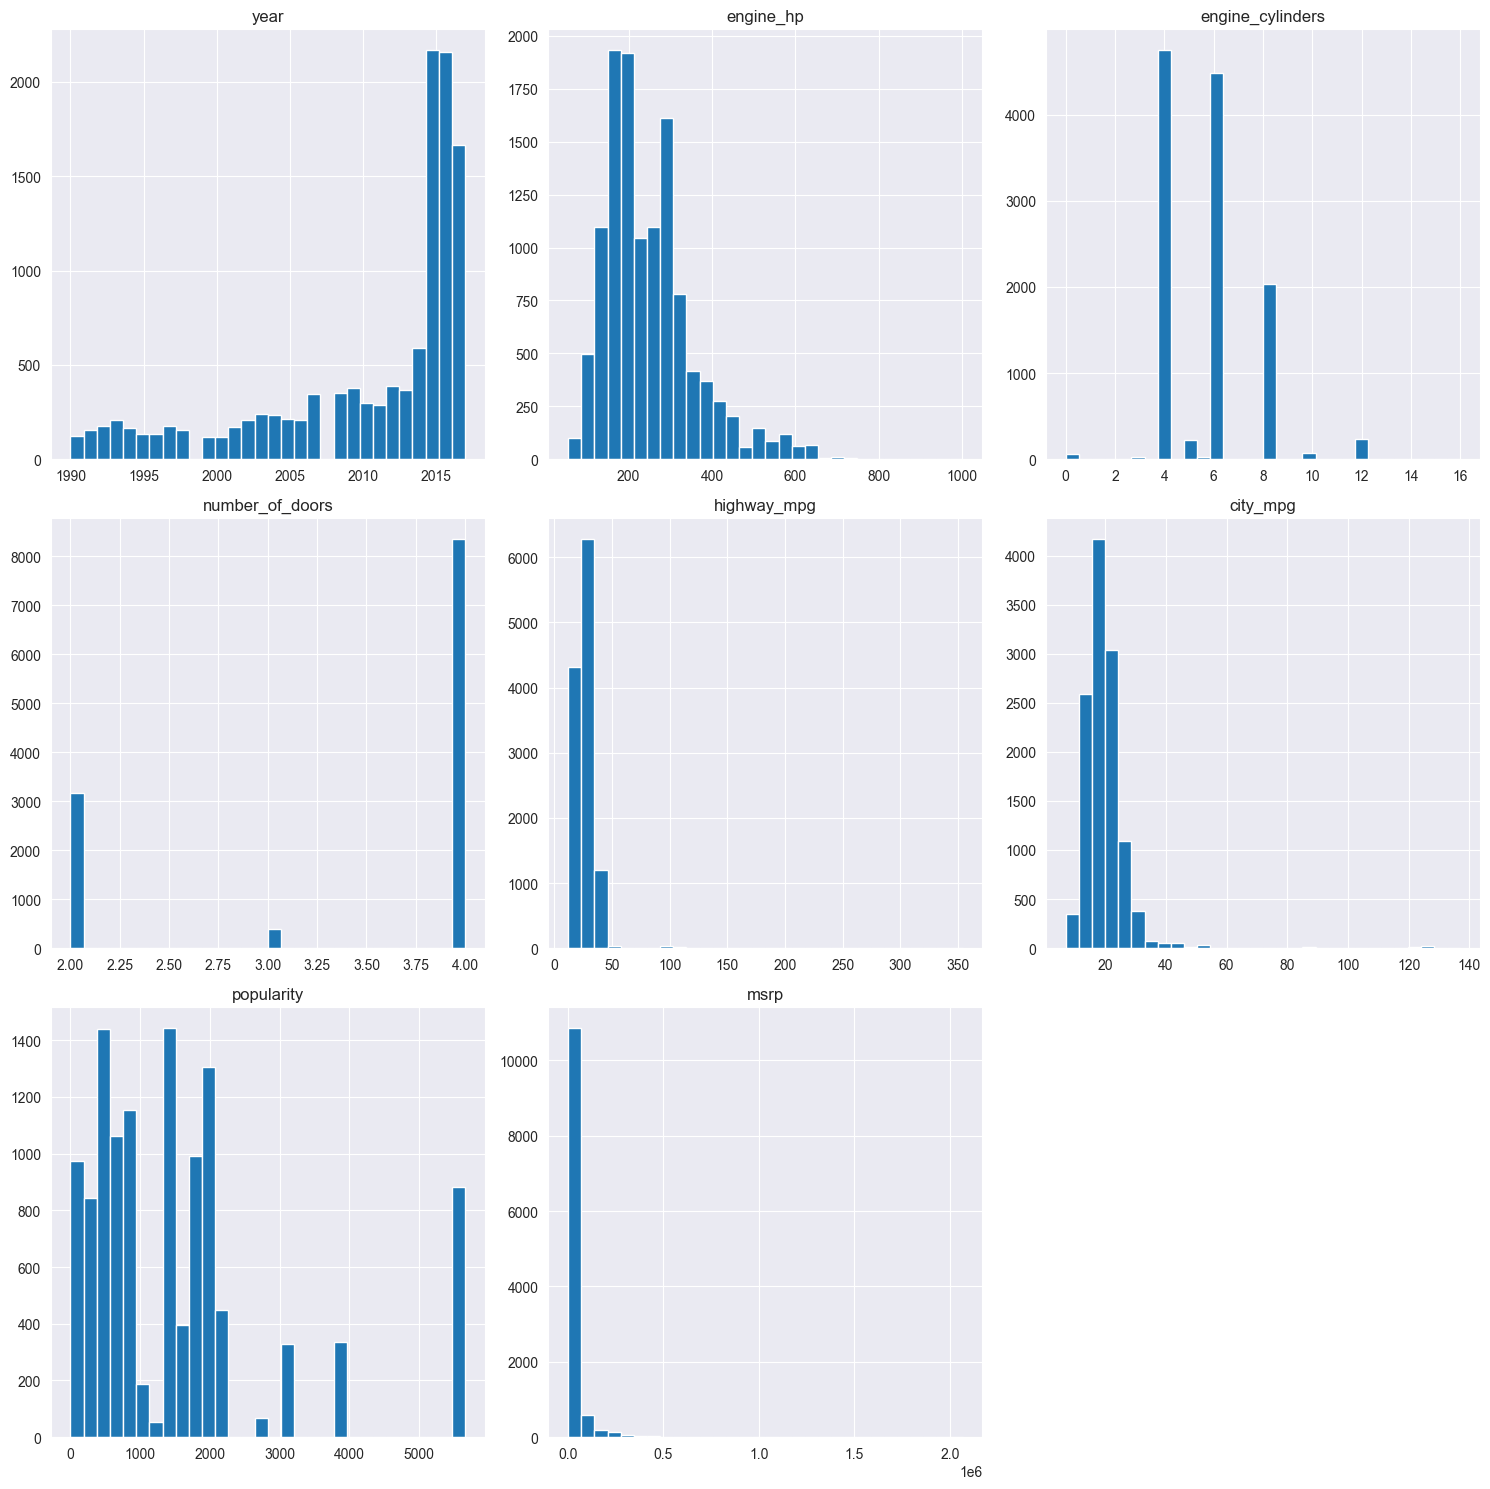

In [43]:
sns.set_style('dark')
df.hist(figsize = (15, 15), bins = 30)
plt.tight_layout()

# Handling skewed dis

In [44]:
df_full_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [45]:
skewed_cols = ['year','engine_hp','highway_mpg','city_mpg']

In [46]:
from sklearn.preprocessing import FunctionTransformer

fn_trf = FunctionTransformer(func=np.log1p)


df_train_updated[skewed_cols] = fn_trf.fit_transform(df_train_updated[skewed_cols])
df_val_updated[skewed_cols] = fn_trf.transform(df_val_updated[skewed_cols])
df_test_updated[skewed_cols] = fn_trf.transform(df_test_updated[skewed_cols])

<Axes: xlabel='year', ylabel='Count'>

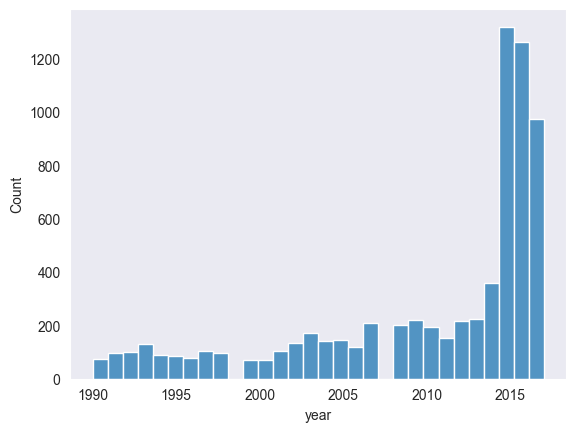

In [47]:
sns.histplot(df_train['year'], bins = 30)

In [49]:
df_test_updated

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,make_alfa_romeo,make_aston_martin,make_audi,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
7275,7.609367,5.463832,4.0,4.0,3.367296,3.135494,454,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4558,7.609862,5.786897,6.0,4.0,3.295837,2.995732,5657,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5261,7.608871,6.042633,8.0,4.0,3.178054,2.772589,1439,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6579,7.608871,6.251904,8.0,4.0,2.890372,2.639057,617,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5229,7.608374,6.311735,10.0,2.0,3.044522,2.708050,1158,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3963,7.605392,5.420535,6.0,4.0,2.995732,2.772589,436,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11408,7.603399,5.111988,6.0,4.0,3.044522,2.890372,481,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7318,7.608374,5.262690,4.0,4.0,3.555348,3.178054,1720,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1620,7.608374,6.552508,12.0,2.0,2.833213,2.397895,1158,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


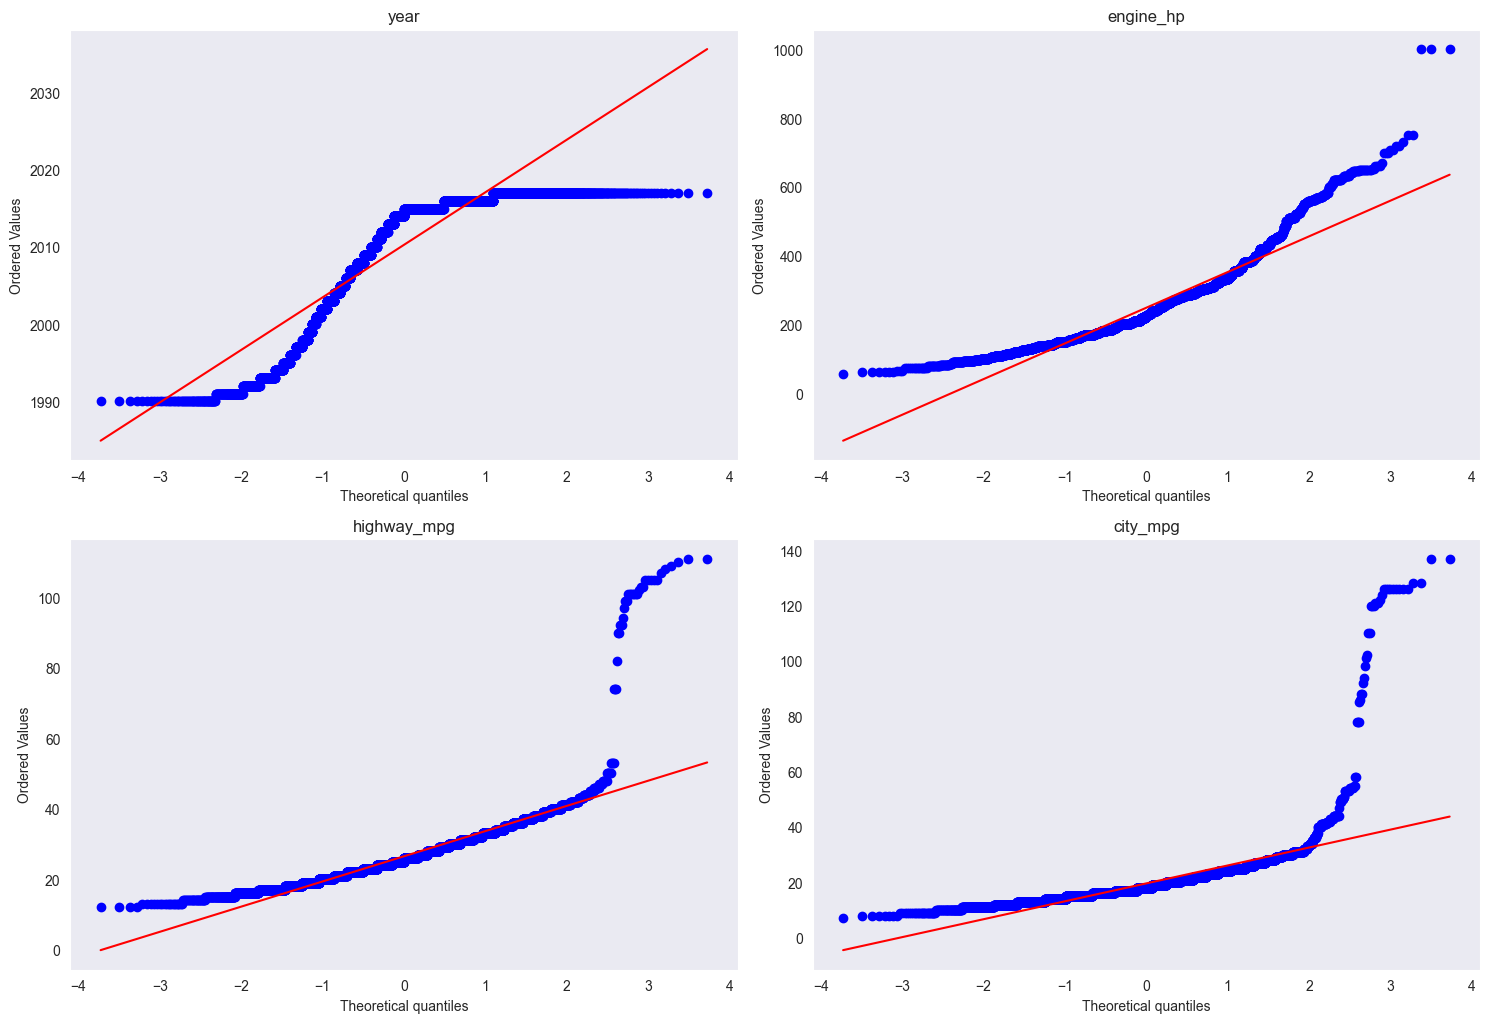

In [50]:
import scipy.stats as stats
plt.figure(figsize=(15,15))

i=1
for feature in skewed_cols:
        plt.subplot(3,2,i)
        stats.probplot(df_train[feature],dist='norm',plot=plt)
        plt.title(feature)
        plt.tight_layout()
        i+=1
    

# Handling Outliers

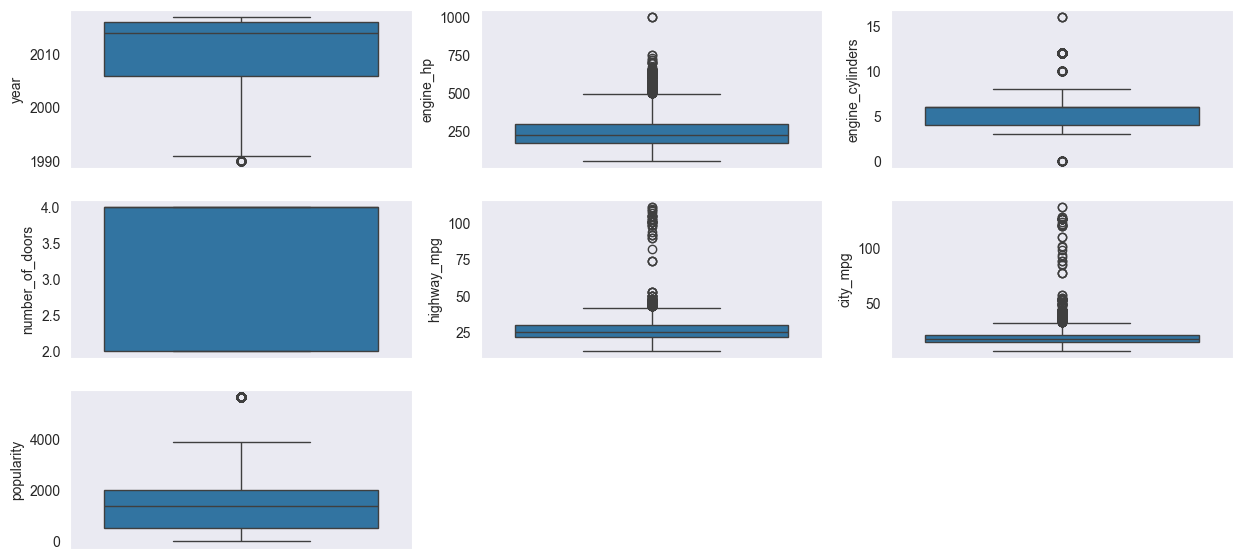

In [51]:
plt.figure(figsize = (15, 7))
i = 1
for feature in df_train.columns:
    if df_train[feature].dtypes != 'object':
        plt.subplot(3, 3, i)
        sns.boxplot(df_train[feature])
        i+=1

In [52]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

# Linear regression

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [54]:
df_train

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
3820,1995,205.0,6.0,4.0,26,17,26
3822,1995,225.0,6.0,4.0,26,17,26
3833,2013,145.0,4.0,2.0,37,27,1439
2066,2015,241.0,4.0,4.0,34,25,617
3124,2015,192.0,4.0,4.0,31,22,2202
...,...,...,...,...,...,...,...
10272,2008,260.0,6.0,4.0,22,15,5657
9837,2017,185.0,4.0,4.0,25,21,1720
7777,2015,360.0,6.0,4.0,36,29,190
7308,1990,93.0,4.0,4.0,31,22,1851


In [55]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df_train_updated.select_dtypes(include=['float64', 'int64']).columns

scalar=StandardScaler()
df_train_updated[numeric_cols]=scalar.fit_transform(df_train_updated[numeric_cols])
df_val_updated[numeric_cols]=scalar.transform(df_val_updated[numeric_cols])

df_test_updated[numeric_cols] = scalar.transform(df_test_updated[numeric_cols])

In [56]:
ridge = Ridge()

params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100, 200]
}

ridge_cv = GridSearchCV(ridge, params, scoring='r2', cv=5)
ridge_cv.fit(df_train_updated, y_train)


,estimator,Ridge()
,param_grid,"{'alpha': [0.001, 0.01, ...]}"
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,50


In [57]:
df_train_updated

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,make_alfa_romeo,make_aston_martin,make_audi,...,vehicle_style_convertible,vehicle_style_convertible_suv,vehicle_style_coupe,vehicle_style_crew_cab_pickup,vehicle_style_extended_cab_pickup,vehicle_style_passenger_minivan,vehicle_style_passenger_van,vehicle_style_regular_cab_pickup,vehicle_style_sedan,vehicle_style_wagon
3820,-2.013871,-0.258144,0.208583,0.644103,0.060572,-0.318514,-1.066939,-0.01183,-0.086442,-0.172288,...,-0.272513,-0.048833,-0.334989,-0.24447,-0.241888,-0.191583,-0.100887,-0.18842,1.724009,-0.223508
3822,-2.013871,-0.033667,0.208583,0.644103,0.060572,-0.318514,-1.066939,-0.01183,-0.086442,-0.172288,...,-0.272513,-0.048833,-0.334989,-0.24447,-0.241888,-0.191583,-0.100887,-0.18842,1.724009,-0.223508
3833,0.357766,-1.092177,-0.920476,-1.619921,1.427303,1.246360,-0.084077,-0.01183,-0.086442,-0.172288,...,-0.272513,-0.048833,2.985169,-0.24447,-0.241888,-0.191583,-0.100887,-0.18842,-0.580043,-0.223508
2066,0.619972,0.132046,-0.920476,0.644103,1.098415,0.983886,-0.655848,-0.01183,-0.086442,-0.172288,...,-0.272513,-0.048833,-0.334989,-0.24447,-0.241888,-0.191583,-0.100887,-0.18842,1.724009,-0.223508
3124,0.619972,-0.416065,-0.920476,0.644103,0.740036,0.549656,0.446655,-0.01183,-0.086442,-0.172288,...,-0.272513,-0.048833,-0.334989,-0.24447,-0.241888,-0.191583,-0.100887,-0.18842,-0.580043,-0.223508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10272,-0.298889,0.315154,0.208583,0.644103,-0.580674,-0.735676,2.849905,-0.01183,-0.086442,-0.172288,...,-0.272513,-0.048833,-0.334989,-0.24447,-0.241888,-0.191583,-0.100887,-0.18842,-0.580043,4.474109
9837,0.881918,-0.505565,-0.920476,0.644103,-0.090360,0.392217,0.111383,-0.01183,-0.086442,-0.172288,...,-0.272513,-0.048833,-0.334989,-0.24447,-0.241888,-0.191583,-0.100887,-0.18842,-0.580043,-0.223508
7777,0.619972,1.100948,0.208583,0.644103,1.320651,1.490718,-0.952863,-0.01183,-0.086442,-0.172288,...,-0.272513,-0.048833,-0.334989,-0.24447,-0.241888,-0.191583,-0.100887,-0.18842,1.724009,-0.223508
7308,-2.676456,-2.158884,-0.920476,0.644103,0.740036,0.549656,0.202505,-0.01183,-0.086442,-0.172288,...,-0.272513,-0.048833,-0.334989,-0.24447,-0.241888,-0.191583,-0.100887,-0.18842,-0.580043,-0.223508


In [58]:
model = Ridge(alpha = 50)
model.fit(df_train_updated, y_train)

,alpha,50
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [59]:
best_ridge = ridge_cv.best_estimator_
y_pred = best_ridge.predict(df_val_updated)

print("Validation R²:", r2_score(y_val, y_pred))
print("Validation RMSE:", np.sqrt(mean_squared_error(y_val, y_pred)))


Validation R²: 0.9737461628029999
Validation RMSE: 0.1816367063028412


In [60]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred_train = ridge_cv.best_estimator_.predict(df_train_updated)
print("Train R²:", r2_score(y_train, y_pred_train))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))


Train R²: 0.9783895927506646
Train RMSE: 0.16225548328503697


In [61]:
best_ridge = ridge_cv.best_estimator_

y_pred_test = best_ridge.predict(df_test_updated)


In [62]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("Test R²:", r2_score(y_test, y_pred_test))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))


Test R²: 0.9668284778448832
Test RMSE: 0.19970928770900007
